<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/sepsisprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory data analysis##

import libraries

In [1]:
import pandas as pd
import numpy as np
#visual libs
import matplotlib.pyplot as plt
import seaborn as sns

# Ml techniques
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
path = '/gdrive/My Drive/'

In [4]:
sepsis_data=pd.read_csv(path+'dataSepsis.csv', sep=';')

In [5]:
sepsis_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,NaN,7.37,90.0,91.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,7.9,113.0,2.5,NaN,78.0,NaN,2.5,4.4,5.1,NaN,NaN,27.8,9.7,NaN,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,0.8,NaN,NaN,NaN,NaN,30.0,NaN,10.9,98.0,0.9,NaN,113.0,NaN,2.4,2.3,3.8,NaN,NaN,26.2,8.8,30.5,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,111.0,0.7,NaN,73.0,NaN,NaN,NaN,3.8,NaN,NaN,36.9,12.2,NaN,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,1.0,7.22,36.0,NaN,452.0,68.0,88.0,5.9,113.0,3.8,NaN,263.0,2.2,1.9,3.8,4.6,1.4,NaN,45.0,15.8,26.6,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [6]:
sepsis_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HR,103.00,58.00,91.00,92.00,155.50,73.00,NaN,82.00,89.00,100.00,95.00,86.00,88.00,116.00,110.00
O2Sat,90.00,95.00,94.00,100.00,94.50,99.00,NaN,100.00,100.00,95.00,100.00,96.00,100.00,97.00,99.00
Temp,NaN,36.11,38.50,NaN,NaN,36.06,NaN,35.50,NaN,37.28,NaN,38.00,36.30,38.28,36.40
SBP,NaN,143.00,133.00,NaN,147.50,100.00,NaN,112.00,141.00,121.00,89.00,111.00,99.00,200.00,116.00
MAP,NaN,77.00,74.00,NaN,102.00,67.00,NaN,79.50,85.00,20.00,62.33,66.00,66.00,108.00,219.00
DBP,NaN,47.00,48.00,NaN,NaN,49.50,NaN,63.00,57.00,NaN,NaN,49.00,52.00,90.00,66.00
Resp,30.00,11.00,34.00,NaN,33.00,16.50,NaN,14.00,17.00,NaN,18.00,17.00,16.00,24.00,19.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00,-8.00,0.00,0.00,1.00,NaN,NaN,1.00,-3.00,6.00,-8.00
HCO3,45.00,22.00,31.00,29.00,13.00,16.00,25.00,23.00,25.00,22.00,22.00,27.00,20.00,NaN,19.00


In [7]:
sepsis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

percentage missing values

In [8]:
sepsis_data.isna().sum(axis=0).sort_values(ascending=False)/len(sepsis_data)*100

Bilirubin_direct    96.881715
EtCO2               95.556719
Fibrinogen          94.102253
TroponinI           89.681009
Lactate             88.612198
SaO2                88.058509
FiO2                82.295741
BaseExcess          80.210457
PaCO2               76.778139
pH                  74.599196
Alkalinephos        71.712302
Bilirubin_total     71.591097
AST                 71.376233
PTT                 61.778965
HCO3                53.214699
Temp                52.892403
Chloride            52.165170
Phosphate           40.036362
Unit1               38.788497
Unit2               38.788497
Magnesium           23.775550
DBP                 23.097901
Calcium             21.153105
WBC                 13.338108
Platelets           13.313316
Hgb                 12.357446
Hct                 11.354746
Creatinine          11.134373
BUN                 10.401631
Potassium            9.897526
Glucose              8.387968
Resp                 6.644262
SBP                  4.641618
O2Sat     

In [9]:
sepsis_data.nunique()

HR                    248
O2Sat                  69
Temp                  292
SBP                   427
MAP                   537
DBP                   253
Resp                  132
EtCO2                  91
BaseExcess            134
HCO3                  118
FiO2                   57
pH                     80
PaCO2                 269
SaO2                  216
AST                   916
BUN                   200
Alkalinephos          547
Calcium               408
Chloride               69
Creatinine           1072
Bilirubin_direct      165
Glucose               751
Lactate               585
Magnesium              69
Phosphate             149
Potassium             243
Bilirubin_total       252
TroponinI             871
Hct                   552
Hgb                   248
PTT                   938
WBC                   576
Fibrinogen            580
Platelets             788
Age                  5835
Gender                  2
Unit1                   2
Unit2                   2
HospAdmTime 

In [10]:
sepsis_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


In [11]:
sepsis_data['isSepsis'].value_counts()

0    33655
1     2647
Name: isSepsis, dtype: int64

In [12]:
X_train, X_test,y_train,y_test=train_test_split(sepsis_data.drop('isSepsis',axis=1), sepsis_data['isSepsis'], test_size=0.25, 
                                                random_state=1234)

In [13]:
sns.set_theme(context='notebook', style='whitegrid',palette='tab10')

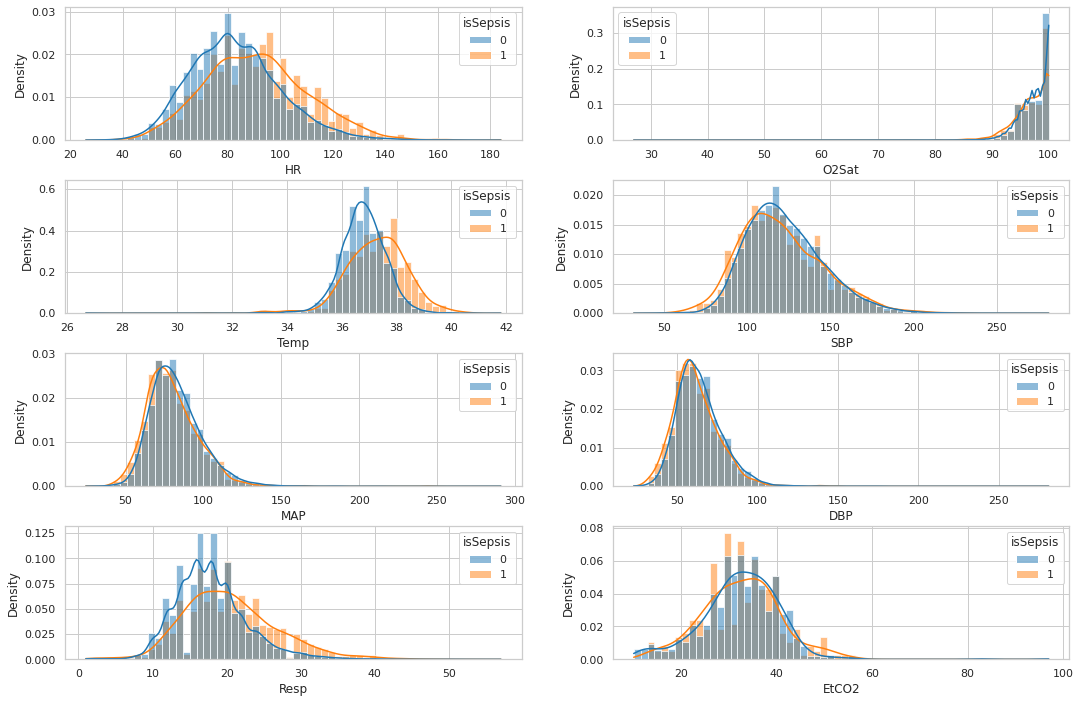

In [14]:
vital_parameters=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP','DBP','Resp','EtCO2']

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace=.3)
for i, column in enumerate(vital_parameters,1):
  plt.subplot(4,2,i)
  sns.histplot(data=X_train, x=column, hue=y_train, stat='density', common_norm=False, bins=60, kde=True)

  plt.savefig(path+'vital_parameters.png', dpi=400)

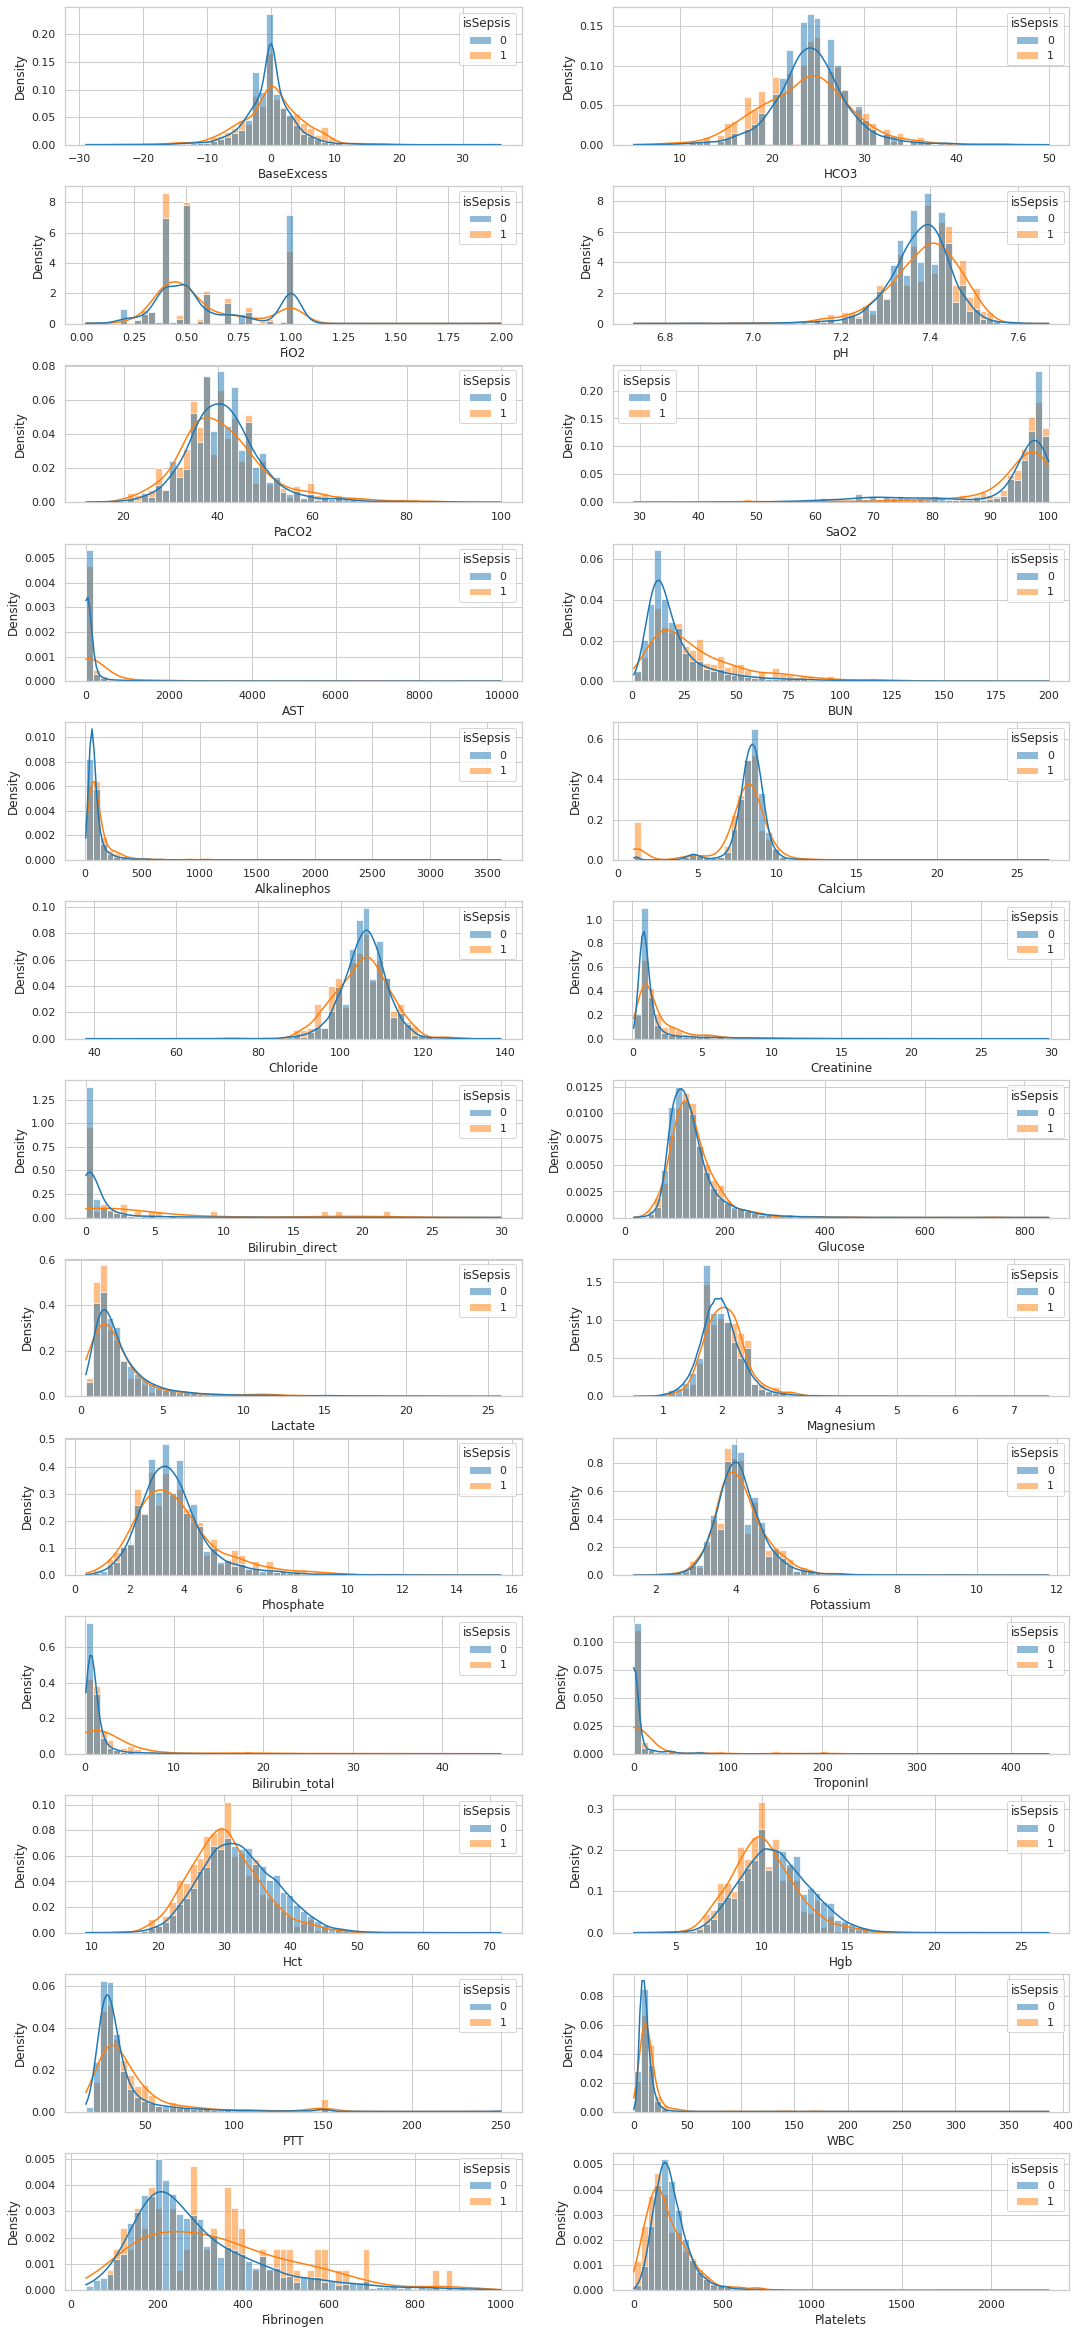

In [15]:
lab_parameters = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_parameters, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
plt.savefig(path+"lab_parameters.png", dpi=400)

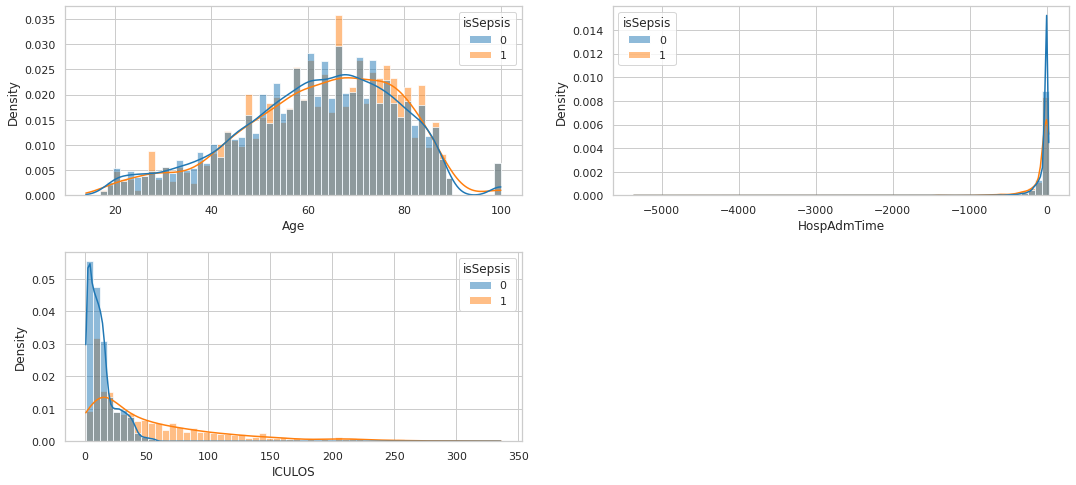

In [16]:
demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)
    
plt.savefig(path+"demographics.png", dpi=400)


In [17]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"
    
    sns.countplot(x=gender, hue=y_train, dodge=False)    

    
def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])
    
    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

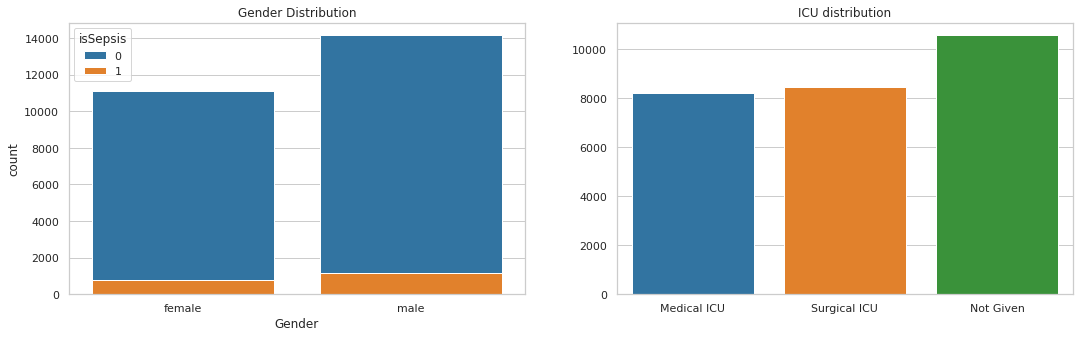

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])   
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

plt.savefig(path+"gender_icu dist.png", dpi=400)

In [19]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

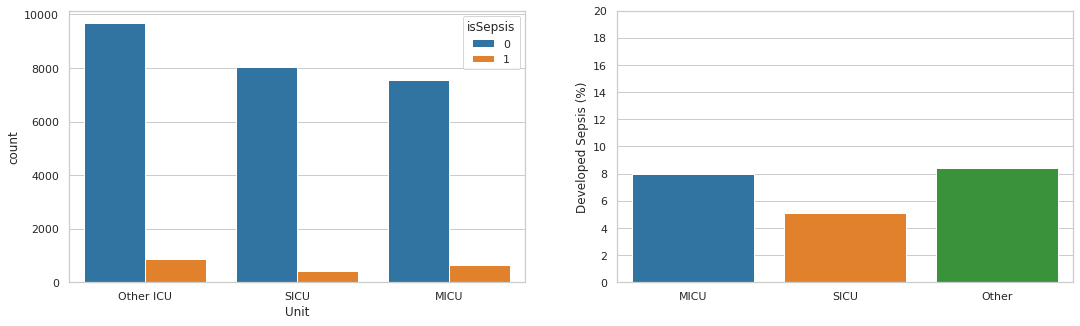

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

plt.savefig(path+"devsepsispercent.png", dpi=400)

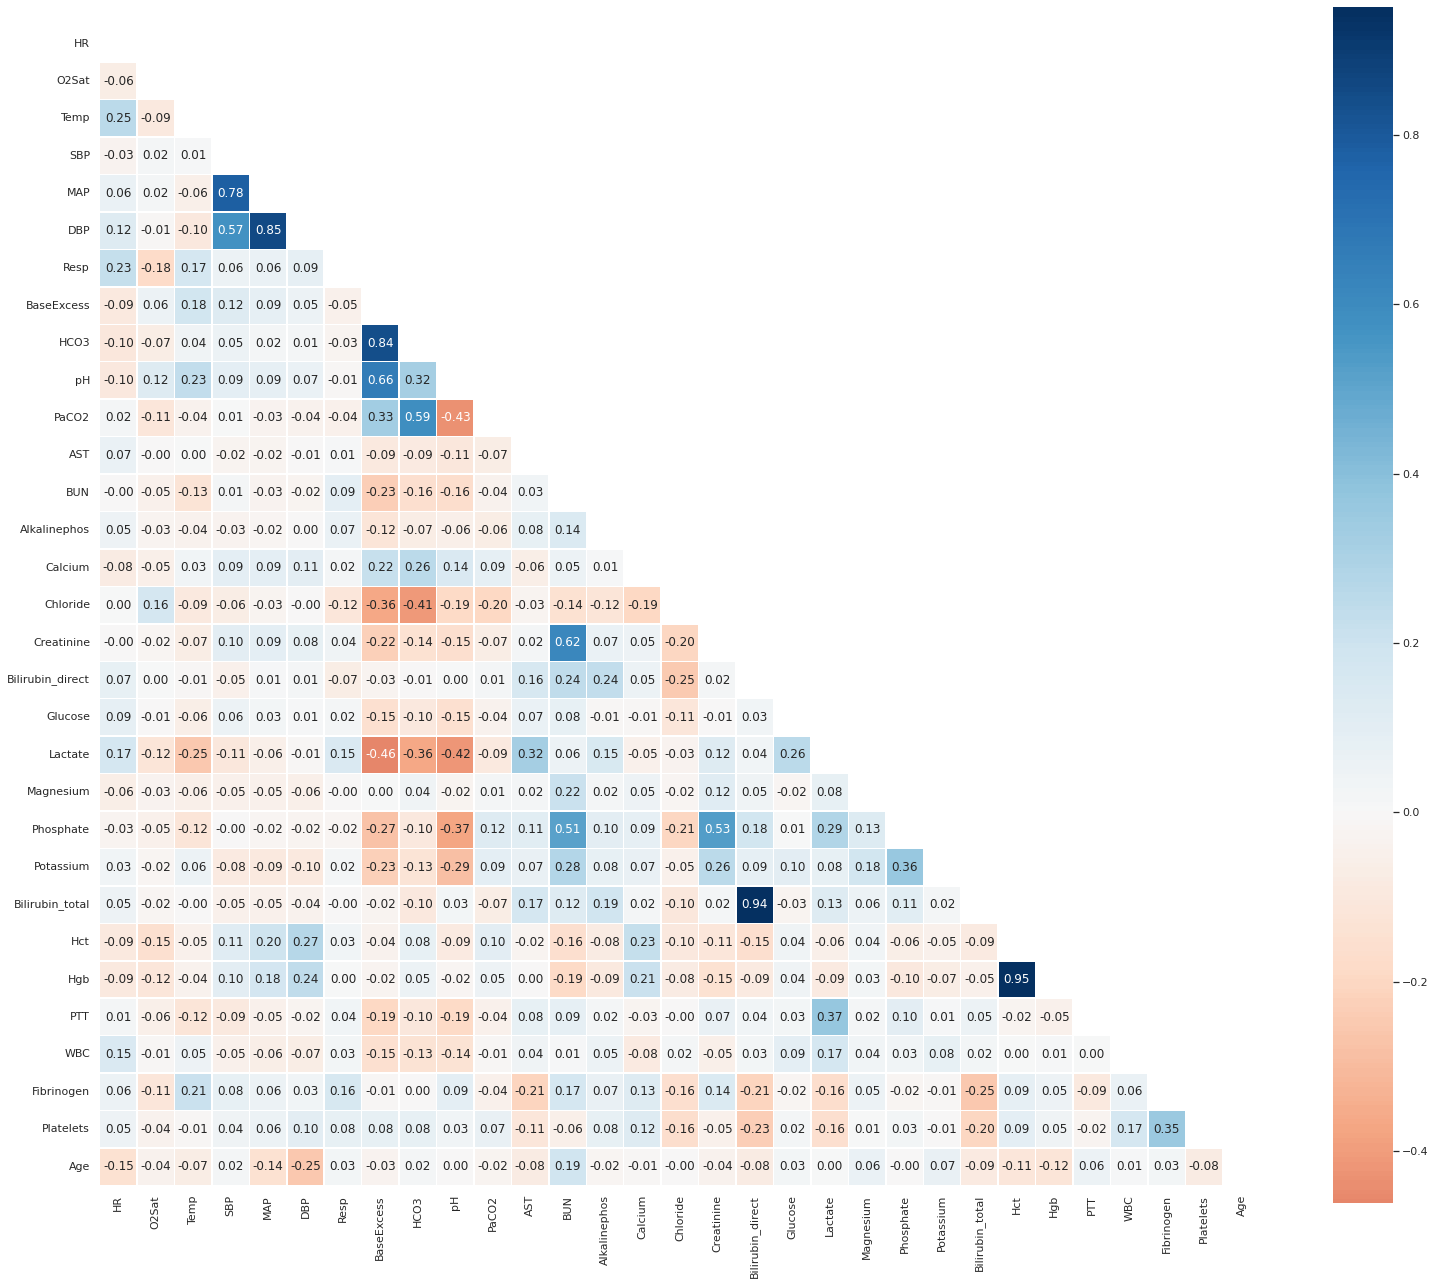

In [21]:
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(26,22))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

plt.savefig(path+"correlationmatrix.png", dpi=400)

In [22]:
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

Bilirubin_total     1.000000
Bilirubin_direct    0.942821
Alkalinephos        0.187682
Name: Bilirubin_total, dtype: float64

In [23]:
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.854100
SBP    0.573256
Name: DBP, dtype: float64

In [24]:
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.783647
DBP    0.573256
Name: SBP, dtype: float64

In [25]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.837930
PaCO2         0.586828
pH            0.324589
Name: HCO3, dtype: float64

In [26]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.659719
HCO3          0.324589
Temp          0.230346
Name: pH, dtype: float64

In [27]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.586828
BaseExcess    0.330008
Phosphate     0.123957
Name: PaCO2, dtype: float64

In [28]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.950666
DBP    0.242492
Name: Hgb, dtype: float64

In [29]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

X_train.columns
chi_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'ICULOS']

X_chi = X_train[chi_cols].copy()

imputer = SimpleImputer(strategy="median")
X_chi[chi_cols] = imputer.fit_transform(X_chi)

chis = chi2(X_chi, y_train)

len(chi_cols)
chis[0].reshape(len(chi_cols),1)

chi_dict = {}
p_dict = {}
for i in range(len(chi_cols)):
    chi_dict[chi_cols[i]] = chis[0][i]
    p_dict[chi_cols[i]] = chis[1][i]

In [30]:
p_dict

{'AST': 0.0,
 'Age': 5.811306157521304e-07,
 'Alkalinephos': 6.726743538561133e-12,
 'BUN': 2.195598933557518e-12,
 'Bilirubin_direct': 0.12648589380977723,
 'Bilirubin_total': 4.655315609702825e-19,
 'Calcium': 0.001265078108539887,
 'Chloride': 0.67983870107422,
 'Creatinine': 7.122317926829376e-06,
 'DBP': 4.481157090659042e-22,
 'EtCO2': 0.7687521759794891,
 'FiO2': 0.6237926827213414,
 'Fibrinogen': 0.0045114960592666,
 'Glucose': 1.5132837644634875e-13,
 'HCO3': 0.05208429060819656,
 'HR': 1.0021245616838789e-289,
 'Hct': 2.121395586338335e-15,
 'Hgb': 5.7442793388232977e-05,
 'ICULOS': 0.0,
 'Lactate': 0.2700571513657032,
 'MAP': 1.997366764696856e-37,
 'Magnesium': 0.3879067767020461,
 'O2Sat': 0.03456462995086097,
 'PTT': 0.37026272850480235,
 'PaCO2': 0.9499661242101946,
 'Phosphate': 0.7453758860994506,
 'Platelets': 0.0,
 'Potassium': 0.44782584655283453,
 'Resp': 8.338215449395174e-130,
 'SBP': 2.3081366164934113e-17,
 'SaO2': 0.8881843335056916,
 'Temp': 0.071804198417630

In [31]:
X_train[X_train["Calcium"] < 2].head().T

,29053,32882,27316,19840,35047
HR,80,104,113,69,82
O2Sat,96,92,98,100,NaN
Temp,37.2,35.9,36.5,37.45,34.8
SBP,176,130,132,135.5,113
MAP,110,80,90,92,89
DBP,78,58,56,64.5,77
Resp,15,8,20.5,16,NaN
EtCO2,NaN,NaN,40,38,27
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [32]:
X_train["Calcium"][X_train["Calcium"] < 2].count()

206

In [33]:
X_train[X_train["PTT"] > 150].head().T

,29419,33595,32804,24503,22697
HR,69,130,62,74,66
O2Sat,98,95,97,98,92
Temp,NaN,NaN,NaN,36.8,NaN
SBP,110,128,128,129,118
MAP,80,91,106,66,88
DBP,56,78,89,41,72
Resp,25,26,12,16,20
EtCO2,NaN,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN


In [34]:
X_train["Calcium"][X_train["PTT"] > 150].count()

34

In [35]:
y_train = y_train.loc[X_train["Age"] <= 90]
X_train = X_train.loc[X_train["Age"] <= 90]

y_test = y_test.loc[X_test["Age"] <= 90]
X_test = X_test.loc[X_test["Age"] <= 90]

In [37]:
from sklearn.preprocessing import FunctionTransformer

In [38]:
def discretizateAge(data):
    # children, youth, adult, senior
    bins = [10, 20, 40, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(X_train["Age"]).shape

(26975, 1)

In [39]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(26975, 1)

In [40]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])

units_pipeline.fit_transform(X_train[units]).shape

(26975, 3)

In [41]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [42]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(26975, 1)

In [43]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total", 
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

(26975, 18)

In [44]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [45]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.1s


(26975, 24)

In [46]:
X_train = preprocessing_pipeline.fit_transform(X_train)

X_test = preprocessing_pipeline.fit_transform(X_test)

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.1s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.1s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [50]:
from sklearn.model_selection import cross_validate

In [52]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)
cv_logreg = cross_validate(logreg, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_logreg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


{'fit_time': array([0.1868031 , 0.16838169, 0.20948601]),
 'score_time': array([0.00711179, 0.00674963, 0.00688624]),
 'test_score': array([0.49775785, 0.4922049 , 0.46659117]),
 'train_score': array([0.48824188, 0.48345485, 0.49553571])}

In [48]:
train_pred = logreg.predict(X_train)

test_pred = logreg.predict(X_test)

# Use score method to get accuracy of model
score = logreg.score(X_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 94.94 %
Test F1 Score = 95.09 %


[[8300   17]
 [ 424  243]]


Text(0.5, 1.0, 'Test F1 Score:95.09%')

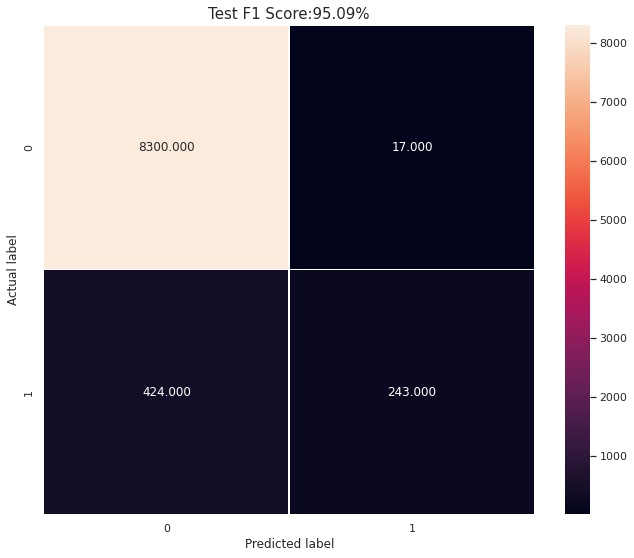

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [54]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25017
           1       0.91      0.33      0.49      1958

    accuracy                           0.95     26975
   macro avg       0.93      0.67      0.73     26975
weighted avg       0.95      0.95      0.94     26975

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8317
           1       0.93      0.36      0.52       667

    accuracy                           0.95      8984
   macro avg       0.94      0.68      0.75      8984
weighted avg       0.95      0.95      0.94      8984



In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
cv_knn = cross_validate(knn, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_knn

{'fit_time': array([0.21949863, 0.12233734, 0.12179136]),
 'score_time': array([10.12451506, 10.79070139, 11.39662123]),
 'test_score': array([0.46171694, 0.45475638, 0.43705463]),
 'train_score': array([0.44470588, 0.45920746, 0.4735023 ])}

In [55]:
train_pred = knn.predict(X_train)

test_pred = knn.predict(X_test)

# Use score method to get accuracy of model
score = knn.score(X_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 94.96 %
Test F1 Score = 94.94 %


[[8309    8]
 [ 447  220]]


Text(0.5, 1.0, 'Test F1 Score:94.94%')

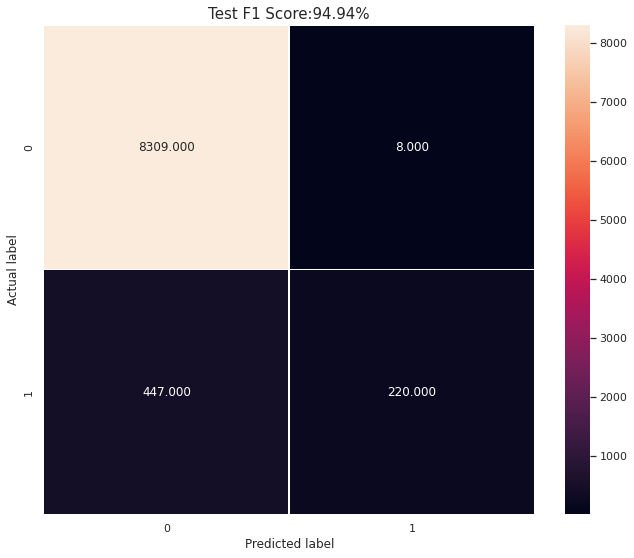

In [56]:
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [57]:
cv_knn = cross_validate(knn, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_knn

{'fit_time': array([0.24040151, 0.12770653, 0.12491417]),
 'score_time': array([10.22805309, 10.25869346, 10.5016849 ]),
 'test_score': array([0.46171694, 0.45475638, 0.43705463]),
 'train_score': array([0.44470588, 0.45920746, 0.4735023 ])}

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, verbose=1)
cv_rf = cross_validate(rf, X_train, y_train, cv=3, scoring="f1", return_train_score=True)
cv_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'fit_time': array([0.30320454, 0.29797149, 0.29952049]),
 'score_time': array([0.01897001, 0.01900697, 0.02012706]),
 'test_score': array([0.73175182, 0.73229071, 0.70763501]),
 'train_score': array([0.95683453, 0.96761453, 0.96638988])}

In [61]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf.score(X_test, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of Random Forest on test set: 0.95


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [62]:
train_pred = rf.predict(X_train)

test_pred = rf.predict(X_test)

# Use score method to get accuracy of model
score = rf.score(X_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = rf.score(X_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 99.5 %
Test F1 Score = 95.08 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[[8309    8]
 [ 434  233]]


Text(0.5, 1.0, 'Test F1 Score:95.08%')

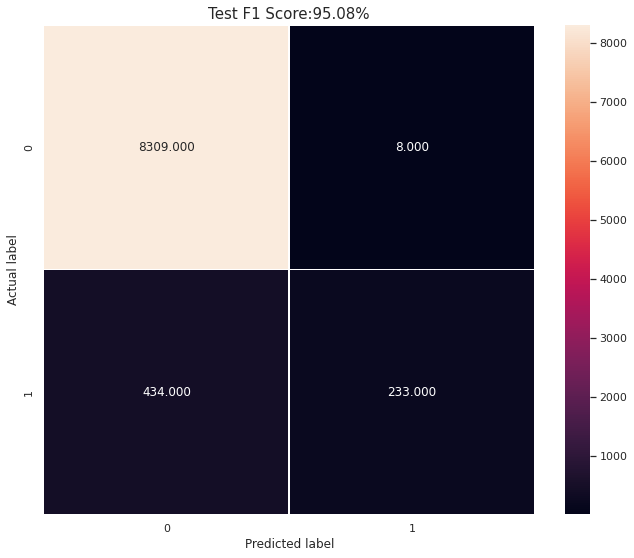

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [64]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(n_estimators=150, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
cv_xgboost = cross_validate(xgboost, X_train, y_train, cv=3, scoring="f1", return_train_score=True, verbose=1)
cv_xgboost

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


{'fit_time': array([2.2739222 , 2.13513279, 2.14745831]),
 'score_time': array([0.04989338, 0.0521903 , 0.04867053]),
 'test_score': array([0.63219059, 0.63280794, 0.63304982]),
 'train_score': array([0.67674074, 0.68916094, 0.67721148])}

In [65]:
params = {"n_estimators": [150, 200],"max_delta_step": [0.1], "subsample": [None, 0.5, 1], "reg_lambda": [1, 1.1], "alpha": [0, 0.1]}

In [66]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgboost, param_grid=params, verbose=2, scoring="f1", cv=2)
grid_search = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None, total=   0.0s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=None, total=   0.0s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: Invalid Parameter format for subsample expect float but value='None'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5, total=   2.3s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=0.5, total=   2.3s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1, total=   1.8s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1, subsample=1, total=   1.8s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1.1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1.1, subsample=None, total=   0.0s
[CV] alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1.1, subsample=None 
[CV]  alpha=0, max_delta_step=0.1, n_estimators=150, reg_lambda=1.1, subsample=None, total=   0.0s
[CV] alpha=0, m

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.3min finished


In [67]:
grid_search.best_score_

0.6063364765296495

In [68]:
grid_search.best_params_

{'alpha': 0,
 'max_delta_step': 0.1,
 'n_estimators': 150,
 'reg_lambda': 1,
 'subsample': 0.5}

In [69]:
from sklearn.metrics import plot_confusion_matrix

xgboost = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, scale_pos_weight=12, eval_metric="aucpr", verbosity=1, disable_default_eval_metric=1)
xgboost.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, eval_metric='aucpr', gamma=0,
              learning_rate=0.1, max_delta_step=0.1, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=12, seed=None,
              silent=None, subsample=0.5, use_label_encoder=False, verbosity=1)

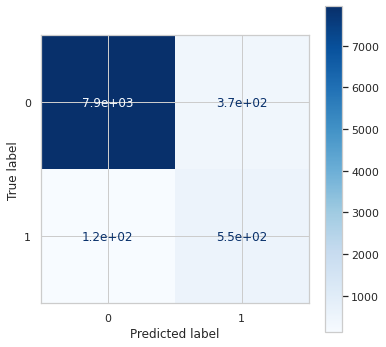

In [70]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues", ax=ax)
plt.savefig(path+"confusion.png", dpi=400)

In [71]:
train_pred = xgboost.predict(X_train)

test_pred = xgboost.predict(X_test)

# Use score method to get accuracy of model
score = xgboost.score(X_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))

# Use score method to get accuracy of model
score = rf.score(X_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 93.02 %
Test F1 Score = 95.08 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[[7943  374]
 [ 118  549]]


Text(0.5, 1.0, 'Test F1 Score:95.08%')

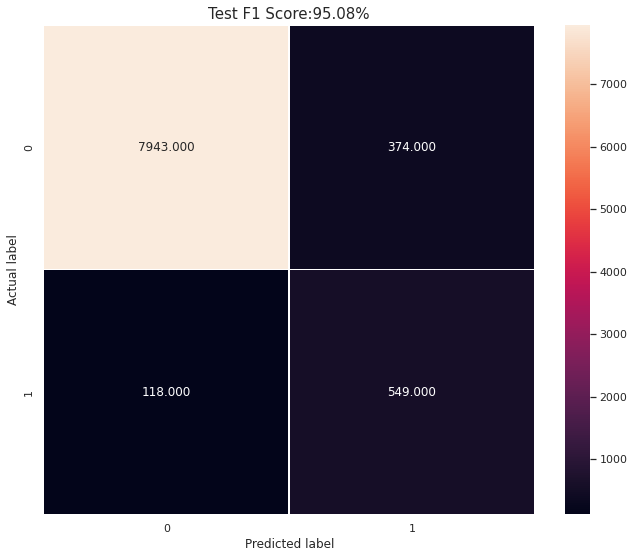

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(score, 4)*100)
plt.title(all_sample_title, size = 15)

In [73]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     25017
           1       0.51      0.80      0.62      1958

    accuracy                           0.93     26975
   macro avg       0.75      0.87      0.79     26975
weighted avg       0.95      0.93      0.94     26975

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8317
           1       0.59      0.82      0.69       667

    accuracy                           0.95      8984
   macro avg       0.79      0.89      0.83      8984
weighted avg       0.96      0.95      0.95      8984



In [74]:
pred_prob1 = logreg.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = rf.predict_proba(X_test)
pred_prob4 = xgboost.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [75]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [77]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.855744786017476 0.8847199581644791 0.8913444564239461 0.9485245353756933


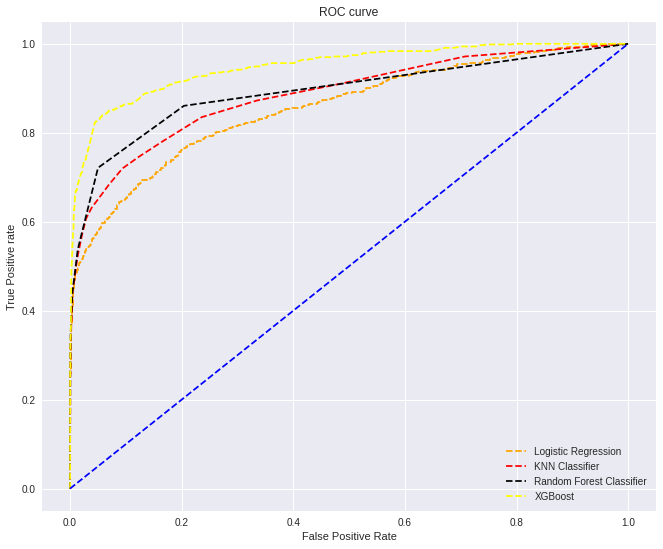

In [78]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(11,9))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Random Forest Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();